In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [118]:
class NdimInterpolation:
    def __init__(self, function):
        self.function = function
        self.interpolated_func = None
    
    def fit(self, X):
        differences = self.calcDifferences(X)
        
        grid = np.meshgrid(*X)
        func_values = self.function(*grid)
        
        val_iterator = np.nditer(func_values, flags=['multi_index', 'c_index'])
        
        func_str = "lambda {}: 0".format(",".join(["x" + str(i) for i in range(X.shape[0])]))
        
        
        for val in val_iterator:
            func_str += " + " + str(val) + " "
            
            indices = val_iterator.multi_index
            coeffs = [] * len(indices)
            divisor = 1
            
            for i in range(len(indices)):
                (cur_diff_divisor, cur_diff_coeff) = differences
                divisor *= cur_diff_divisor[i][indices[i]]
                func_str += "* {}".format(cur_diff_coeff[i][indices[i]])
            func_str += " / {}\\\n".format(divisor)
        
        self.interpolated_func = eval(func_str)
        
    def calcDifferences(self, X):
        res = np.full_like(X, 1)
        str_res = []
        
        for k, x in enumerate(X):
            total = np.prod(x)
            
            cur_str_array = []
            
            for i in range(x.size):
                cur_str = "1"
                
                for j in range(x.size):
                    if i == j:
                        continue
                    
                    res[k, i] *= x[i] - x[j]
                    cur_str += (" * (x{} - {})".format(k, x[j]))
                    
                cur_str_array.append(cur_str)

            str_res.append(cur_str_array)
        return res, str_res
    
    def getValue(self, *args):
        func_args = np.meshgrid(*args)
        return self.interpolated_func(*func_args)        

Error: 0.8760443715025179


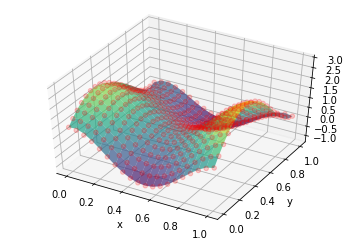

In [119]:
# 1 / (1 +x) + y + z

def biFunction(x, y):
    return np.sin(5 * x) + np.cos(6 * y) + np.sin(3 * x * y)

model = NdimInterpolation(function=biFunction)

X_train, Y_train = np.linspace(0, 1, 5), np.linspace(0, 1, 5)
model.fit(np.array([X_train, Y_train]))

x, y = np.linspace(0, 1, 20), np.linspace(0, 1, 20)
Z = model.getValue(x, y)

ax = plt.axes(projection='3d')
ax.view_init(45)
ax.set_xlabel("x")
ax.set_ylabel("y")

X, Y = np.meshgrid(x, y)
Z_orig = biFunction(Y, X)
print("Error: {}".format(np.linalg.norm(Z - Z_orig)))

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(X, Y, Z_orig, color='red', alpha=0.2)
plt.show()

Error: 0.7208459018321124


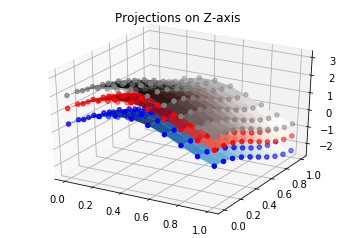

In [120]:
def triFunc(x, y, z):
    return np.cos(3 * x) + np.sin(4 * y) + np.cos(5 * z)

model = NdimInterpolation(function=triFunc)

X_train, Y_train, Z_train = np.linspace(0, 1, 5), np.linspace(0, 1, 5), np.linspace(0, 1, 5)
model.fit(np.array([X_train, Y_train, Z_train]))

x, y, z = np.linspace(0, 1, 10), np.linspace(0, 1, 10), np.linspace(0, 1, 10)
X, Y, Z = np.meshgrid(x, y, z)
X_train, Y_train, Z_train = np.meshgrid(X_train, Y_train, Z_train)

F = model.getValue(x, y, z)
F_orig = triFunc(Y, X, Z)

print("Error: {}".format(np.linalg.norm(F - F_orig)))

z_level = [0, 4, 9]

ax = plt.axes(projection='3d')
ax.set_title("Projections on Z-axis")

cmaps = ['Greys', 'Blues', 'Reds']
colors = ['grey', 'blue', 'red']
for z, cmap, color in zip(z_level, cmaps, colors):
    ax.plot_surface(X[:,:,z], Y[:,:,z], F[:,:,z], cmap=cmap, alpha=0.9)
    ax.scatter(X[:,:,z], Y[:,:,z], F_orig[:,:,z], c=color)
